In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data=pd.read_csv('boston.csv')


In [53]:
#参考答案
class LineaRegression:
    def __init__(self,alpha,times):
        self.alpha=alpha
        self.times=times
    def fit(self,X,y):
        X=np.asarray(X)
        y=np.asarray(y)
        self.w=np.zeros(1+X.shape[1])
        self.loss_=[]
        for i in range(self.times):
            y_hat=np.dot(X,self.w[1:])+self.w[0]
            error=y-y_hat
            self.loss_.append(np.sum(error**2)/2)
            self.w[0]+=self.alpha*np.sum(error)
            self.w[1:]+=self.alpha*np.dot(X.T,error)
    def predict(self,X):
        X=np.asarray(X)
        result=np.dot(X,self.w[1:])+self.w[0]
        return(result)

In [64]:
#参考1
t=data.sample(len(data),random_state=0)
train_X=t.iloc[:400,:-1]
train_y=t.iloc[:400,-1]
test_X=t.iloc[400:,:-1]
test_y=t.iloc[400:,-1]

lr=LineaRegression(alpha=0.002,times=20)
error=lr.fit(train_X,train_y)

result=lr.predict(test_X)
display(np.mean((test_y-result)**2))
display(lr.w)
display(lr.loss_)

3.0562394618266294e+218

array([-5.40908145e+103, -2.45196668e+104, -5.37191688e+104,
       -6.45567714e+104, -3.65156366e+102, -3.05597012e+103,
       -3.37213685e+104, -3.82575232e+105, -1.96884445e+104,
       -5.95118638e+104, -2.36811679e+106, -1.00901636e+105,
       -1.92412384e+106, -7.14341956e+104])

[116831.44,
 5634434480019929.0,
 3.476096783213034e+26,
 2.145840181135159e+37,
 1.3246597541740116e+48,
 8.177326122191343e+58,
 5.047987779863635e+69,
 3.116199628692102e+80,
 1.9236774234273485e+91,
 1.1875153296764984e+102,
 7.330712733032923e+112,
 4.525360459042715e+123,
 2.7935738351862277e+134,
 1.7245156144507308e+145,
 1.0645697160483787e+156,
 6.571750761956952e+166,
 4.056841691645411e+177,
 2.504350074617179e+188,
 1.5459733883999081e+199,
 9.543528845527071e+209]

In [67]:
#参考2
t=data.sample(len(data),random_state=0)
train_X=t.iloc[:400,:-1]
train_y=t.iloc[:400,-1]
test_X=t.iloc[400:,:-1]
test_y=t.iloc[400:,-1]

lr=LinearRegression(alpha=0.0005,times=20)
error=lr.fit(train_X,train_y)

result=lr.predict(test_X)
display(np.mean((test_y-result)**2))
display(lr.w_)
display(lr.loss_)

2.5268413180922583e+194

array([-4.91834304e+91, -2.22951224e+92, -4.88455022e+92, -5.86998643e+92,
       -3.32027589e+90, -2.77871751e+91, -3.06620005e+92, -3.47866130e+93,
       -1.79022122e+92, -5.41126556e+92, -2.15326961e+94, -9.17473442e+92,
       -1.74955789e+94, -6.49533349e+92])

[116831.44,
 352143585635913.9,
 1.3577847231161656e+24,
 5.238488102063899e+33,
 2.0210751390945202e+43,
 7.797564323191207e+52,
 3.0083992526731635e+62,
 1.1606786027493191e+72,
 4.478045318230486e+81,
 1.7276867019540434e+91,
 6.6656345078891096e+100,
 2.5716863678183203e+110,
 9.92189230686906e+119,
 3.827991942603092e+129,
 1.4768878616520924e+139,
 5.698020760231912e+148,
 2.1983687067286727e+158,
 8.481585403222014e+167,
 3.272303264323502e+177,
 1.2624961189018352e+187]

In [40]:
lr.w.shape

(14,)

In [39]:
train_X=np.asarray(train_X)
train_X.shape

(400, 13)

In [11]:
def predict(train_X,train_y,test_X,alpha,iters):
    W=np.zeros(train_X.shape[1]).reshape(-1,1)
    for i in range(iters):
        y_hat=train_X*W
        error=y_hat-train_y
        W+=alpha*error
    result=test_X*W
    return np.asarray(result)

In [14]:
t=data.sample(len(data),random_state=0)
train_X=t.iloc[:400,:-1]
train_y=t.iloc[:400,-1]
test_X=t.iloc[400:,:-1]
test_y=t.iloc[400:,-1]

#train_X=train_X.insert(0,values=1,axis=1)
train_X=np.asmatrix(train_X.copy())
train_y=np.asmatrix(train_y)
test_X=np.asmatrix(test_X.copy())
test_y=np.asmatrix(test_y)

result=predict(train_X,train_y,test_X,0.0001,100)
display(result)


ValueError: operands could not be broadcast together with shapes (13,1) (400,400) (13,1) 

In [77]:
class StandarScale:
    def fit(self,X):
        X=np.asarray(X)
        self.std=np.std(X,axis=0)
        self.mean=np.mean(X,axis=0)
    def transform(self,X):
        
        return((X-self.mean)/self.std)
    def fit_transform(self,X):
        self.fit(X)
        return self.transform(X)

In [79]:
#参考1
t=data.sample(len(data),random_state=0)
train_X=t.iloc[:400,:-1]
train_y=t.iloc[:400,-1]
test_X=t.iloc[400:,:-1]
test_y=t.iloc[400:,-1]

#加入正则化🐘
s=StandarScale()
train_X=s.fit_transform(train_X)
train_y=s.fit_transform(train_y)
test_X=s.fit_transform(test_X)
test_y=s.fit_transform(test_y)




lr=LineaRegression(alpha=0.0005,times=20)
error=lr.fit(train_X,train_y)

result=lr.predict(test_X)
display(np.mean((test_y-result)**2))
display(lr.w)
display(lr.loss_)

0.14908162058540436

array([ 1.53932422e-16, -7.71128657e-02,  3.26567796e-02, -4.17268297e-02,
        7.24609817e-02, -1.22576315e-01,  3.18442051e-01, -9.42920843e-03,
       -2.09339731e-01,  1.03687319e-01, -5.22107348e-02, -1.82317645e-01,
        9.83898220e-02, -3.94766865e-01])

[200.0,
 107.16607914924599,
 88.91896294017965,
 79.79699900354936,
 74.33495874650424,
 70.91957416161512,
 68.7061649307762,
 67.21401040114299,
 66.1640222876996,
 65.39167226769372,
 64.79841173790199,
 64.32419686701928,
 63.931764580828826,
 63.597523544384345,
 63.30621040418721,
 63.04771396296815,
 62.815162490703536,
 62.603756023524795,
 62.4100435515406,
 62.23146925589152]

In [82]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

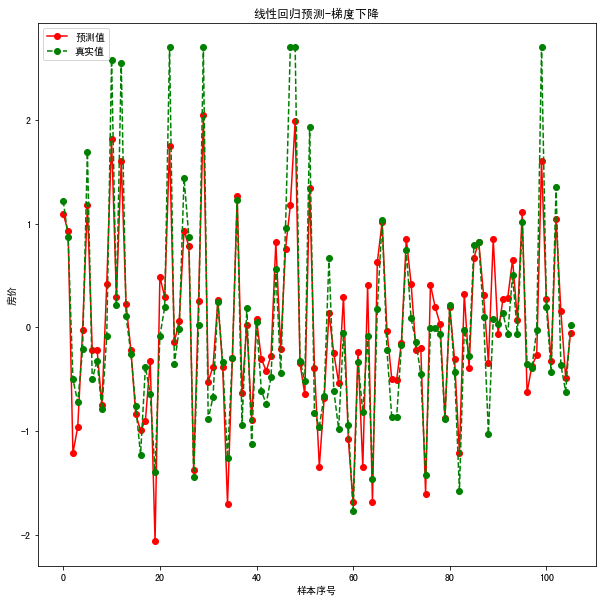

In [83]:
plt.figure(figsize=(10, 10))
# 绘制预测值
plt.plot(result, "ro-", label="预测值")
# 绘制真实值
plt.plot(test_y.values, "go--",label="真实值")
plt.title("线性回归预测-梯度下降")
plt.xlabel("样本序号")
plt.ylabel("房价")
plt.legend()
plt.show()

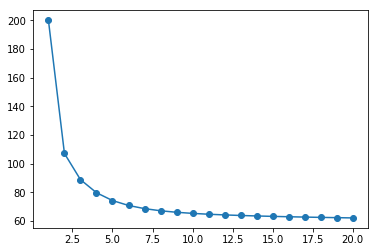

In [81]:
# 绘制累计误差值
plt.plot(range(1, lr.times + 1), lr.loss_, "o-")